DATA LOADING

In [1]:
#Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get the file you want to use
file_name = "C:\\Users\\Lisa\\Downloads\\stroke_data.csv"

In [3]:
#loading the csv file
df = pd.read_csv("C:\\Users\\Lisa\\Downloads\\stroke_data.csv")

DATA INSPECTION

In [4]:
# Preview first 5 rows of the dataset to get a sense of its structure.
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Preview last 5 rows of the dataset to get a sense of its structure.
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# checking the shape of the dataset 
df.shape

(5110, 12)

In [7]:
#checking for the data types in the dataset
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
#checking for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

DATA CLEANING

In [9]:
#dropping the missing values
df1 = df.dropna(how="any")
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
#check the shape after dropping the missing values
df1.shape

(4909, 12)

In [11]:
#checking for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

<Axes: >

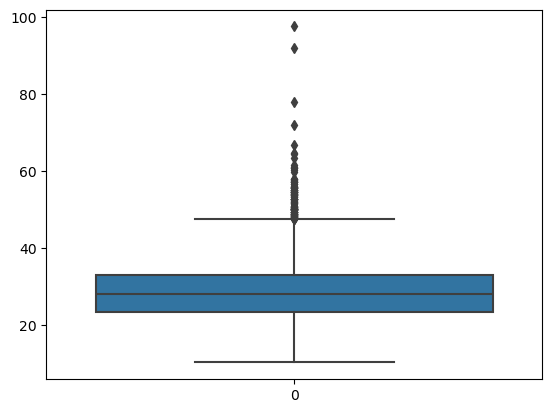

In [12]:
#checking for outliers
sns.boxplot(df1["bmi"])

In [13]:
#removing outliers using interquartile range method
q1 = df1["bmi"].quantile(0.25)
q3 = df1["bmi"].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(23.5, 33.1, 9.600000000000001)

In [14]:
#finding the upper limit and lower limit
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit, lower_limit

(47.5, 9.099999999999998)

<Axes: >

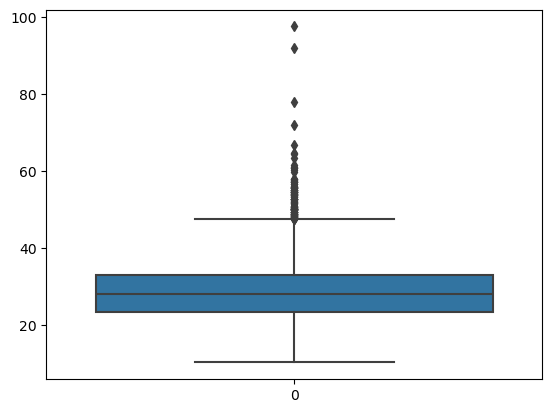

In [15]:
sns.boxplot(df1["bmi"])

In [16]:
#finding the outliers
df1.loc[(df1["bmi"] > upper_limit) | (df1["bmi"] < lower_limit)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1696,Female,43.0,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0


In [19]:
#handling the outliers - trimming the data
df2 = df1.loc[(df1["bmi"] <= upper_limit) & (df1["bmi"] >=lower_limit)]
#print the data after removing the outliers
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: >

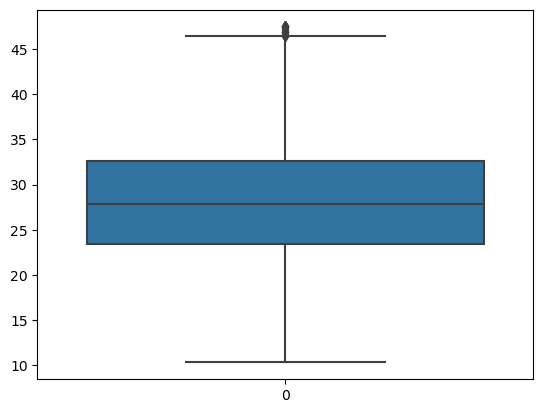

In [20]:
#checking the box plot after removing the outliers
sns.boxplot(df2["bmi"])

In [21]:
df2.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
EXPLORATORY DATA ANALYSIS

In [22]:
# Generate descriptive statistics for numerical columns (mean, median, std)
df2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,37169.133569,42.828739,0.089602,0.050427,104.968956,28.313586,0.043134
std,20957.671300,22.723815,0.285640,0.218848,44.039454,6.841250,0.203180
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18753.000000,24.500000,0.000000,0.000000,77.040000,23.400000,0.000000
50%,37660.000000,44.000000,0.000000,0.000000,91.650000,27.900000,0.000000
75%,55326.000000,61.000000,0.000000,0.000000,113.245000,32.600000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,47.500000,1.000000


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

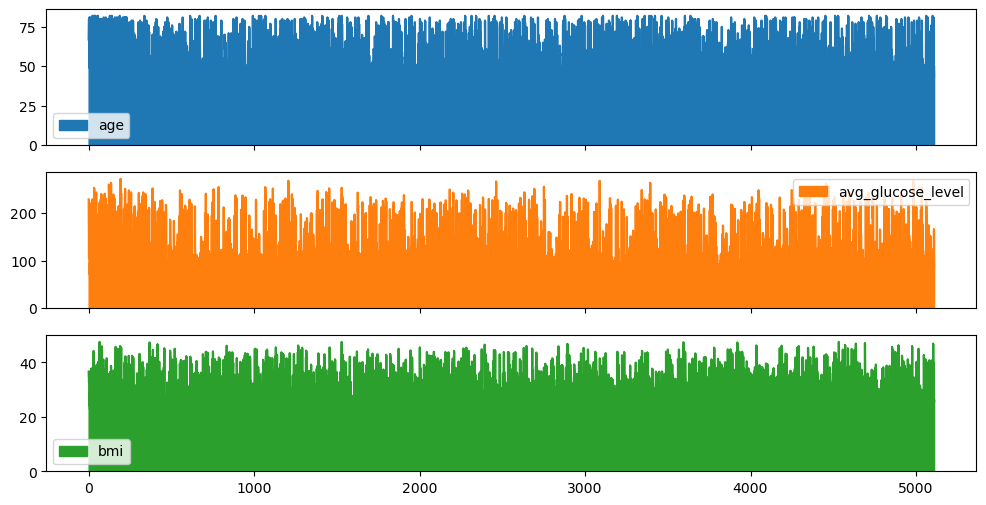

In [23]:
# Explore the distribution of age, avg_glucose_level, and bmi
df2[["age","avg_glucose_level","bmi"]].plot.area(figsize = (12, 6), subplots = True)

Text(0.5, 1.0, 'Distribution of Strokes')

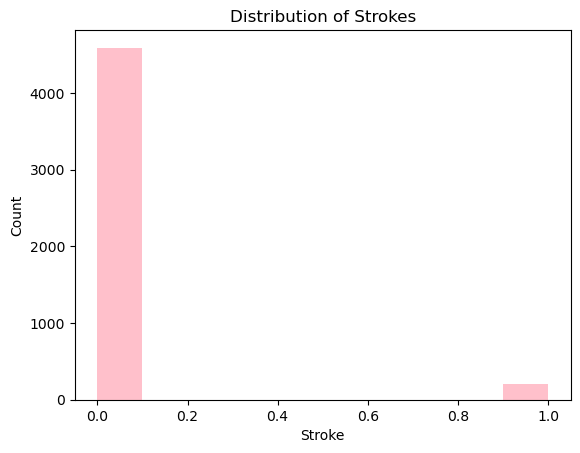

In [27]:
# Visualize the distribution of strokes in the dataset.
df2['stroke'].plot.hist(color = "pink")
# Set plot labels and title
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Strokes')


In [37]:
#Analyze the distribution of gender, work_type, and smoking_status with respect to strokes
# Distribution of strokes by gender
gender_stroke_distribution = df2.groupby('gender')['stroke'].value_counts(normalize=True).unstack()
print("\nDistribution of strokes by gender:\n", gender_stroke_distribution)

# Distribution of strokes by work type
work_type_stroke_distribution = df2.groupby('work_type')['stroke'].value_counts(normalize=True).unstack()
print("\nDistribution of strokes by work type:\n", work_type_stroke_distribution)

# Distribution of strokes by smoking status
smoking_status_stroke_distribution = df2.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack()
print("\nDistribution of strokes by smoking status:\n", smoking_status_stroke_distribution)

# Distribution of strokes by gender, work_type, smoking status
genworksmoke_rel_stroke_distribution = df2[["gender","work_type","smoking_status","stroke"]].groupby("stroke").value_counts(normalize = True).unstack()
print("\nDistribution of strokes by gender, work_type,smoking status:\n", genworksmoke_rel_stroke_distribution)



Distribution of strokes by gender:
 stroke         0         1
gender                    
Female  0.958037  0.041963
Male    0.955186  0.044814
Other   1.000000       NaN

Distribution of strokes by work type:
 stroke                0         1
work_type                        
Govt_job       0.954323  0.045677
Never_worked   1.000000       NaN
Private        0.953914  0.046086
Self-employed  0.931489  0.068511
children       0.998510  0.001490

Distribution of strokes by smoking status:
 stroke                  0         1
smoking_status                     
Unknown          0.980123  0.019877
formerly smoked  0.930061  0.069939
never smoked     0.954545  0.045455
smokes           0.945908  0.054092

Distribution of strokes by gender, work_type,smoking status:
 smoking_status                Unknown  formerly smoked  never smoked    smokes
stroke gender work_type                                                       
0      Female Govt_job       0.015244         0.013720      0.034190

In [38]:
#Explore the correlation between hypertension, heart_disease, and strokes.
data = df2[["hypertension","heart_disease","stroke"]]
sd = pd.DataFrame(data)
correlation_matrix = sd.corr()
correlation_matrix_AB = correlation_matrix.loc["hypertension", "heart_disease"]
correlation_matrix_AC = correlation_matrix.loc["hypertension", "stroke"]
correlation_matrix_BC = correlation_matrix.loc["heart_disease", "stroke"]

correlation_matrix

,hypertension,heart_disease,stroke
hypertension,1.000000,0.121082,0.145273
heart_disease,0.121082,1.000000,0.138562
stroke,0.145273,0.138562,1.000000
